In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.utils import np_utils
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard
import pandas as pd
import numpy as np
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.utils import class_weight
import os
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
import scikitplot as skplt
from sklearn.neural_network import MLPClassifier
import matplotlib 
from sklearn import metrics
from numpy.random import RandomState

np.random.seed(1337)

Using TensorFlow backend.


In [3]:
Char_Dict={0:"च",1:"क",2:"त्रि",3 : "म",4 : "व",5 : "४",6 : "ह",7 : "छ",8 : "ध",9 : "त",10 : "६",11 : "झ",12 : "प",13 : "ञ",
14 : "र",15 : "ण",16 : "ज्ञ",17 : "क्ष",18 : "श",19 : "९",20 : "स",21 : "ब",22 : "३",23 : "२",24 : "द",25 : "भ",26 : "ट",
27 : "ङ",28 : "१",29 : "न",30 : "फ",31 : "८",32 : "ग",33 : "ठ",34 : "ष",35 : "ड",36 : "७",37 : "थ",38 : "ख",39 : "य",
40 : "०",41 : "ज",42 : "५",43 : "ल",44 : "ढ",45 : "घ"}
print(Char_Dict[5])

४


In [4]:
batch_size = 200
nb_classes = 46
nb_epoch = 6
img_rows, img_cols = 32, 32
channels = 1
nb_filters = 32
kernel_size = (4,4)

In [5]:
X_train = np.load("devnagri/X_train.npy")
X_test = np.load("devnagri/X_test.npy")
print("The Shape of the training data is :", X_train.shape)
print("The Shape of the testing data is :", X_test.shape)




The Shape of the training data is : (78200, 32, 32)
The Shape of the testing data is : (13800, 32, 32)


In [6]:
train_labels = pd.read_csv("devnagri/trainlabels.csv")
y_train = np.array(train_labels['character'])

test_labels = pd.read_csv("devnagri/testlabels.csv")
y_test = np.array(test_labels['character'])

In [7]:
print("The Shape of the training labels is :",y_train.shape)
print("The Shape of the testing labels is :",y_test.shape)

The Shape of the training labels is : (78200,)
The Shape of the testing labels is : (13800,)


In [8]:
def reshape_data(arr, img_rows, img_cols, channels):
    
    return arr.reshape(arr.shape[0], img_rows, img_cols, channels)

In [9]:
print("Reshaping Data")
X_train = reshape_data(X_train, img_rows, img_cols, channels)
X_test = reshape_data(X_test, img_rows, img_cols, channels)

Reshaping Data


In [10]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)

X_train Shape:  (78200, 32, 32, 1)
X_test Shape:  (13800, 32, 32, 1)


In [11]:
input_shape = (img_rows, img_cols,channels)

In [12]:
print("Normalizing Data")
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


Normalizing Data


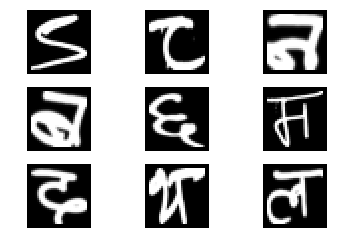

In [14]:
from random import randint

number = [randint(0, 13800) for p in range(0, 9)]

X_test1 = X_test.reshape(X_test.shape[0],1, img_rows, img_cols)

for i, num in enumerate(number):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test1[num,0], cmap='gray')
    plt.axis("off")

In [15]:
y1_test = y_test

In [16]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

y_train Shape:  (78200, 46)
y_test Shape:  (13800, 46)


In [17]:
def cnn_model(X_train, X_test, y_train, y_test, kernel_size, nb_filters, channels, nb_epoch, batch_size, nb_classes):

    model = Sequential()
    model.add(Conv2D(nb_filters, (kernel_size[0], kernel_size[1]),border_mode='valid',input_shape=(img_rows, img_cols,channels)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    kernel_size = (6,6)    
    model.add(Conv2D(20, (kernel_size[0], kernel_size[1])))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())    
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
    print(model.summary())
    model.fit(X_train,y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test,y_test))

    return model

In [18]:
model = cnn_model(X_train, X_test, y_train, y_test, kernel_size, nb_filters, channels, nb_epoch, batch_size, nb_classes)
print("Predicting")
y_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
y1_pred = model.predict_classes(X_test)

/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (4, 4), input_shape=(32, 32, 1..., padding="valid")`
  after removing the cwd from sys.path.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 29, 29, 32)        544       
_________________________________________________________________
activation_1 (Activation)    (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 20)          23060     
_________________________________________________________________
activation_2 (Activation)    (None, 9, 9, 20)          0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 20)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 320)               0         
__________

In [19]:
from sklearn.metrics import confusion_matrix
pd.set_option('display.height', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
cm = confusion_matrix(y1_test,y1_pred)
df=pd.DataFrame(cm)
df.to_csv('devnagri/confusion.csv', index=False, header=True)
cm = pd.read_csv("devnagri/confusion.csv")
cm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,284,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,1,0,2
1,0,298,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,287,0,2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,288,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,271,0,0,0,0,2,0,0,1,0,0,0,0,1,0,0,0,12,0,0,3,0,0,0,0,4,0,0,0,1,0,0,0,0,0,2,1,0,0,0,0,1
5,0,0,0,0,0,289,0,0,0,1,3,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,0,0,0
6,0,0,0,0,0,0,284,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,1,1,0,0,0,0,0,1,0,0,3,0
7,0,0,0,0,0,0,2,287,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5
8,0,0,0,0,0,0,0,0,276,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,10
9,0,0,0,1,6,0,1,0,0,283,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0


In [20]:
from sklearn.utils import shuffle
same=[]
different=[]
m=np.size(y1_test)
for i in range (0,m):
    if(y1_test[i]==y1_pred[i]):
        same.append(i)
    else:
        different.append(i)

different=shuffle(different, random_state=0)        
error=different[0:6]

same=shuffle(same, random_state=0) 
correct=same[0:6]
print(error)
print(y1_test[error[0]],y1_pred[error[0]])
print(correct)
print(y1_test[correct[0]],y1_pred[correct[0]])

[3844, 11930, 4637, 10718, 13740, 5216]
12.0 45
[8081, 11821, 6355, 3958, 7331, 5925]
26.0 26


pridicted: २
Actual : ५


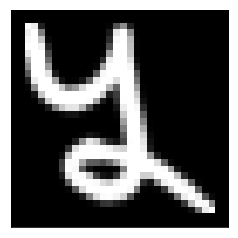

pridicted: र
Actual : च


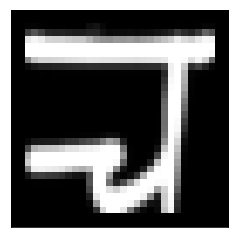

pridicted: ९
Actual : ह


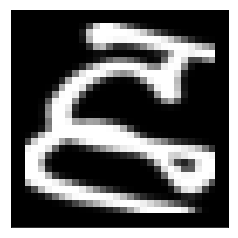

pridicted: ड
Actual : द


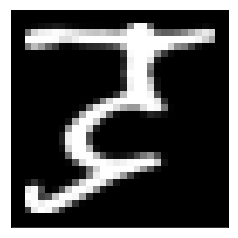

pridicted: ङ
Actual : छ


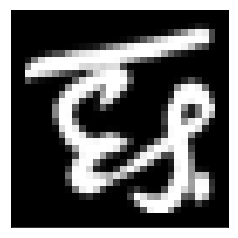

pridicted: व
Actual : त


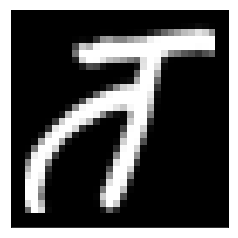

In [53]:
#plt.figure(figsize=(6, 6))

for i in range(6):
    print("pridicted:", Char_Dict[y1_pred[error[i]]])
    print("Actual :", Char_Dict[y1_test[error[i]]])
    plt.imshow(X_test1[error[i],0], cmap='gray')
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.show()


pridicted: ट
Actual : ट


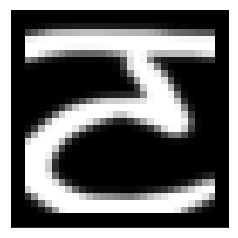

pridicted: य
Actual : य


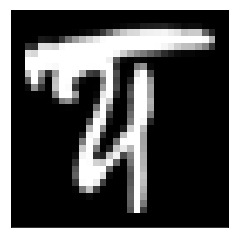

pridicted: ब
Actual : ब


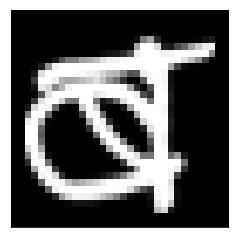

pridicted: ञ
Actual : ञ


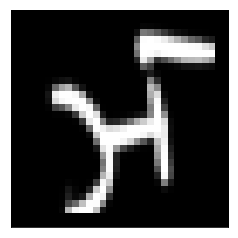

pridicted: द
Actual : द


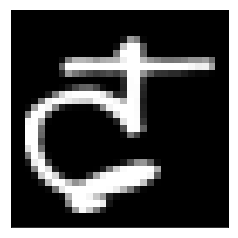

pridicted: ९
Actual : ९


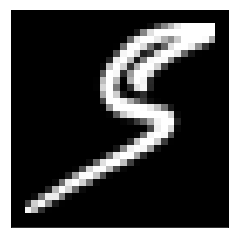

In [21]:
#plt.figure(figsize=(2, 2))
for i in range(6):
    print("pridicted:", Char_Dict[y1_pred[correct[i]]])
    print("Actual :", Char_Dict[y1_test[correct[i]]])
    plt.imshow(X_test1[correct[i],0], cmap='gray')
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.show()